## Project 2019
### GMIT Galway - Programming for Data Analysis
### Slawomir Sowa
#### 04/10/2019


### Objectives:

- Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four diﬀerent variables.
- Investigate the types of variables involved, their likely distributions, and their relationships with each other.
- Synthesise/simulate a data set as closely matching their properties as possible.
- Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

### Tools
Used tools for Programming for Data Analysis Project

<img width='400px' align='left' src='https://www.python.org/static/community_logos/python-logo-master-v3-TM.png'>

<img width='150px' align='left' src='https://jupyter.org/assets/main-logo.svg'>

#### Used Libraries and tools
#### Pandas
Pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. The two primary data structures of pandas, Series (1-dimensional) and DataFrame (2-dimensional), handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering. http://pandas.pydata.org

#### NumPy
NumPy is the fundamental package for scientific computing with Python. It contains among other things: a powerful N-dimensional array object, sophisticated (broadcasting) functions, useful linear algebra, Fourier transform, and random number capabilities, Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases. https://www.numpy.org/

#### Matplotlib
Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib tries to make easy things easy and hard things possible. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code. For examples, see the sample plots and thumbnail gallery. https://matplotlib.org/index.html

#### Seaborn
Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures. https://seaborn.pydata.org/

#### Jupyter Notebook
The Jupyter Notebook is an open-source web application that allows to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more. https://jupyter.org/index.html

## 1. Setting the research goal

As Phenomen, I chose a service that I know well. After arriving in Ireland, I started working in an internet cafe. In a city with a population of around 10,000. The store itself was located on a busy street and has been conducting its business for nearly 20 years. Many customers came regularly to use internet cafe services. It was the only internet cafe in the city. In the description of Phenomen I focused only on generating revenue, excluding expenses.

## 2. Generate Data 

I'll start by importing all the necessary modules: <code>Pandas</code>, <code>Numpy</code>, <code> Matplotlib</code>, <code>Seaborn</code>

### 2.1 Import Modules

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.graphics.gofplots import qqplot
from sklearn.linear_model import LinearRegression

%matplotlib inline

### 2.2 Create Dates of working days for Internet Cafe by using <code>datetime</code> library.

To generate working days in year I used <code>datetime</code> library. I generated a list of days (Saturday and Sunday excluded), then I created a list of public holidays in 2018 and exclude these days from my list of working days. 

In [2]:
# Create dates of working days in 2018
import datetime as dt

# exclude staurday and sunday
excluded = (6,7) 

dates = []
start = dt.datetime(2018,1,1)
end = dt.datetime(2018,12,31)

while start <= end:
    if start.isoweekday() not in excluded: # if start date is not staurday or sunday add to dates list
        dates.append(start.date())
    start += dt.timedelta(days=1) # increment start date by 1

holidays=['2018-01-01','2018-01-02','2018-03-17','2018-04-02','2018-05-07','2018-06-04','2018-08-06','2018-10-29','2018-12-25','2018-12-26']

new_dates = []
for date in dates:
    if date.strftime('%Y-%m-%d') in holidays:
        dates.remove(date)
    else:
        new_dates.append(date)
    
print (new_dates)

[datetime.date(2018, 1, 3), datetime.date(2018, 1, 4), datetime.date(2018, 1, 5), datetime.date(2018, 1, 8), datetime.date(2018, 1, 9), datetime.date(2018, 1, 10), datetime.date(2018, 1, 11), datetime.date(2018, 1, 12), datetime.date(2018, 1, 15), datetime.date(2018, 1, 16), datetime.date(2018, 1, 17), datetime.date(2018, 1, 18), datetime.date(2018, 1, 19), datetime.date(2018, 1, 22), datetime.date(2018, 1, 23), datetime.date(2018, 1, 24), datetime.date(2018, 1, 25), datetime.date(2018, 1, 26), datetime.date(2018, 1, 29), datetime.date(2018, 1, 30), datetime.date(2018, 1, 31), datetime.date(2018, 2, 1), datetime.date(2018, 2, 2), datetime.date(2018, 2, 5), datetime.date(2018, 2, 6), datetime.date(2018, 2, 7), datetime.date(2018, 2, 8), datetime.date(2018, 2, 9), datetime.date(2018, 2, 12), datetime.date(2018, 2, 13), datetime.date(2018, 2, 14), datetime.date(2018, 2, 15), datetime.date(2018, 2, 16), datetime.date(2018, 2, 19), datetime.date(2018, 2, 20), datetime.date(2018, 2, 21), dat

Add newly created dates to our data frame.

In [3]:
df = pd.DataFrame(index=None)
df['Date'] = new_dates

df.head()

,Date
0,2018-01-03
1,2018-01-04
2,2018-01-05
3,2018-01-08
4,2018-01-09


### 2.3 Create weekday for dates

Using <code>calendar</code> library I create a column <code>Week Day</code>. A<code>new_dates</code> list is an input.

In [4]:
import calendar # import calendar module

weekday = [] # create an empty list 

for i in new_dates: # iterate over working day list 
    weekday.append(calendar.day_name[i.weekday()]) # using method day_name() from calendar module generates Week Day name 
                                                # for each date and append it to list    
print (weekday)

['Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Wednesday', 'Thursday', 'Friday'

Now I add column <code>Week Day</code> to data frame

In [5]:
df['Week Day'] = weekday

In [6]:
df.head()

,Date,Week Day
0,2018-01-03,Wednesday
1,2018-01-04,Thursday
2,2018-01-05,Friday
3,2018-01-08,Monday
4,2018-01-09,Tuesday


### 2.4 Generate Number of Customers 

Next step is to generate number of custemers visitnig shop. To do that I am using <code>np.random.randint()</code>. The range depends on the day of the week. Monday and Tuesday were always the busiest days of the week. Where the fewest customers came on Friday. <br>
Discrete unifrom distribution gives each variable equal probability of outcome.   


In [7]:
customers = [] # creates an empty list for customers
np.random.seed(1) # set the seed

for row in df.itertuples(): # iterates over dataframe using method itertuples()
    if row._2 == 'Monday': # row._2 is my Week Day column
        customers.append(np.random.randint(70,140)) # Monday is the busiest day of the week, range between 70-150
    elif row._2 == 'Tuesday':
        customers.append(np.random.randint(60,130)) 
    elif row._2 == 'Wednesday':
        customers.append(np.random.randint(50,110))
    elif row._2 == 'Thursday':
        customers.append(np.random.randint(40,100))
    else:
        customers.append(np.random.randint(40,80)) # The fewest customers came on friday, range between 40-90 
        
print (customers)

[87, 83, 52, 79, 65, 65, 40, 56, 71, 66, 75, 90, 60, 88, 71, 92, 68, 69, 84, 110, 54, 63, 63, 83, 69, 57, 62, 41, 70, 120, 67, 48, 64, 83, 107, 92, 97, 48, 100, 63, 56, 61, 43, 138, 84, 99, 83, 52, 96, 112, 66, 85, 58, 85, 124, 54, 65, 74, 77, 86, 75, 80, 62, 59, 43, 79, 93, 87, 87, 97, 59, 108, 68, 82, 74, 50, 93, 75, 97, 63, 65, 132, 106, 82, 64, 63, 105, 41, 53, 73, 60, 106, 53, 46, 122, 62, 62, 67, 61, 77, 103, 70, 70, 76, 89, 47, 44, 127, 73, 60, 63, 57, 77, 84, 60, 68, 60, 102, 72, 51, 70, 64, 72, 70, 104, 72, 58, 136, 108, 104, 55, 45, 87, 102, 70, 94, 62, 83, 113, 70, 50, 72, 125, 121, 106, 65, 61, 89, 72, 59, 95, 74, 63, 60, 46, 126, 119, 65, 64, 49, 136, 113, 55, 76, 77, 91, 100, 63, 67, 53, 110, 105, 73, 56, 68, 115, 127, 102, 42, 54, 116, 60, 79, 51, 75, 123, 93, 52, 60, 59, 118, 114, 82, 68, 58, 101, 88, 80, 50, 48, 102, 68, 70, 53, 55, 91, 40, 59, 94, 80, 94, 55, 70, 84, 79, 109, 66, 62, 77, 113, 97, 86, 74, 102, 79, 53, 64, 59, 108, 107, 89, 45, 55, 133, 92, 92, 50, 42, 

Add <code>customers</code> list to data frame

In [8]:
df['Cust Number'] = customers
df.head()

,Date,Week Day,Cust Number
0,2018-01-03,Wednesday,87
1,2018-01-04,Thursday,83
2,2018-01-05,Friday,52
3,2018-01-08,Monday,79
4,2018-01-09,Tuesday,65


### 2.5 Generate number of printouts

Generate number of printed pages per day in Black / White and Color. Number of printouts is generated as a Number of Customers multiplied by number returned by <code>np.random.uniform()</code>. <code>np.random.uniform()</code> generates uniformly distributed samples over the half-open interval from 0.8 low to 4.5 high (not included) for Black and White printouts and from 0.8 low to 1.5 high (not included) for Color printouts. <br>


In [9]:
np.random.seed(1) # set the seed

bw_prints =  np.rint (customers * np.random.uniform(0.8,4.5,len(customers))) # number of prints is generated as a mutiplication
                                    # of customer number and randomly generated number. Returned number is rounded to integer 
                                    # by np.rint() method. 
        
df['BW/Day'] = bw_prints # Add generated list to dataframe 

# The same steps for color printouts
np.random.seed(1)
color_prints =  np.rint (customers * np.random.uniform(0.8,1.5,len(customers)))
df['color/Day'] = color_prints

Now is good moment to calculate daily income from printouts. <br>
Prices:<br>
- €0.20 per Black And White page<br>
- €0.50 per Color page

In [10]:
# Create new column with black /White income and color income 

df['BW print income'] = df['BW/Day'] *0.2
df['color print income'] = df['BW/Day'] *0.5
df.head()

,Date,Week Day,Cust Number,BW/Day,color/Day,BW print income,color print income
0,2018-01-03,Wednesday,87,204.0,95.0,40.8,102.0
1,2018-01-04,Thursday,83,288.0,108.0,57.6,144.0
2,2018-01-05,Friday,52,42.0,42.0,8.4,21.0
3,2018-01-08,Monday,79,152.0,80.0,30.4,76.0
4,2018-01-09,Tuesday,65,87.0,59.0,17.4,43.5


In [11]:
df.tail()

,Date,Week Day,Cust Number,BW/Day,color/Day,BW print income,color print income
242,2018-12-21,Friday,54,159.0,65.0,31.8,79.5
243,2018-12-24,Monday,87,129.0,81.0,25.8,64.5
244,2018-12-27,Thursday,79,294.0,107.0,58.8,147.0
245,2018-12-28,Friday,75,230.0,92.0,46.0,115.0
246,2018-12-31,Monday,98,98.0,82.0,19.6,49.0


### 2.6 Generates Internet usage column and Total Income

To generate internet usage column I will use Pareto Distribution

 To get expected values of Internet usage per day, depending on the number of customers, I:
 - iterated over number of customers, 
 - generated random value of used minutes per customer, starts from 20 minutes as this is minimu time of usage.
 - rounds values to 5 minutes, because the customer fee is charged for every 5 minutes started. 
 - sum each customer values to get daily value

In [12]:
# Generate total number of internet usage per day depending on the number of customers
np.random.seed(1)

# creates a empty list to hold value of total minutes
minutes_day = []

# iterates over nnumber of customers
for cust in np.nditer(df['Cust Number']):
    
    # minues_per_customer is a random number of usage of internet for each customer generated by np.random.pareto distribution,
    # where minimum time was 20 minues, it was also most popular time   
    minutes_per_customer = (np.random.pareto(2, cust)+1)*20
    
    # rounds all values in minutes_per_customer to 5 minutes.  
    minutes_per_customer_rounded = [int(round(i/5.0)*5.0) for i in  minutes_per_customer]   
    
    # sum values to get daily value of internet usage
    minutes_day.append(sum(minutes_per_customer_rounded))
    

    

Example of daily ussage of internet for 98 customers (in minutes)

In [13]:
print (minutes_per_customer_rounded)

[45, 100, 35, 30, 30, 30, 160, 25, 80, 25, 65, 30, 25, 90, 30, 20, 30, 30, 25, 30, 25, 35, 20, 50, 30, 35, 30, 30, 25, 25, 30, 50, 25, 30, 25, 55, 40, 95, 25, 20, 25, 25, 55, 20, 20, 45, 25, 30, 25, 20, 50, 135, 20, 65, 25, 40, 35, 25, 45, 35, 25, 35, 35, 70, 30, 35, 35, 20, 25, 60, 40, 30, 30, 20, 20, 30, 30, 40, 45, 25, 20, 60, 35, 25, 30, 40, 20, 25, 25, 35, 25, 60, 25, 35, 25, 20, 35, 35]


([<matplotlib.axis.YTick at 0x13b6eaad8c8>,
 <a list of 26 Text yticklabel objects>)

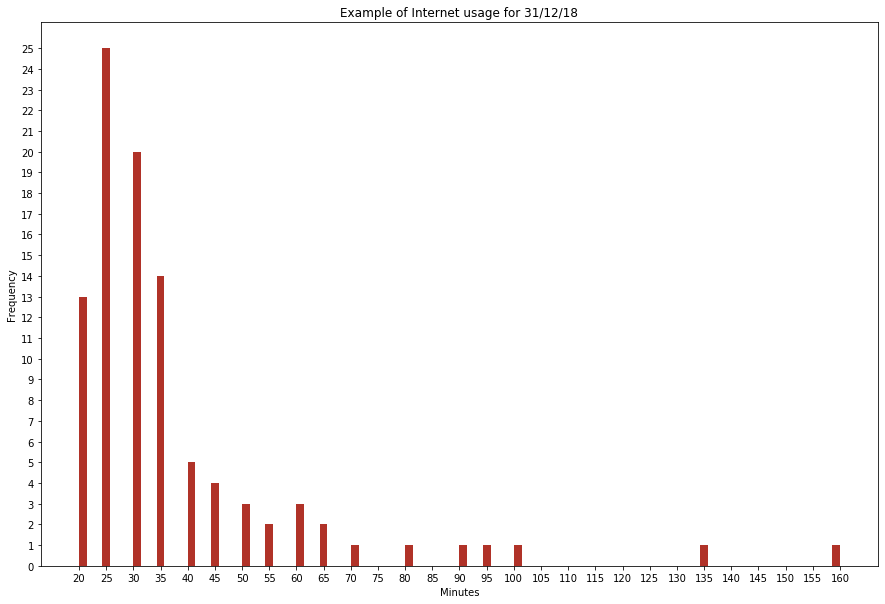

In [14]:
# histogram plot of internet usage [14]
plt.figure(figsize=(15, 10))
plt.hist(minutes_per_customer_rounded, bins=len(minutes_per_customer_rounded), facecolor=(.69, .198, .155)) # plot histogram with number of bins equal 
                                                                            # to length of minutes_per_customer_rounded list 

plt.title('Example of Internet usage for 31/12/18') # set title
plt.xlabel('Minutes') # set X label
plt.ylabel('Frequency') # set Y label

plt.xticks(np.arange(min(minutes_per_customer_rounded),max(minutes_per_customer_rounded)+5 , 5.0)) # set X axis ticks 
plt.yticks(np.arange(0,26,1)) # set Y axis ticks

Add generated customer internet usage to our dataframe

In [15]:
df['Internet Usage'] = minutes_day

Internet Price: 
- €0.25 / 5 min <br>

To get total income for internet usage, I devided internet usage by 5 minutes and multiply by €0.25 

In [16]:
df['Internet Income'] = (df['Internet Usage']/5)*0.25

In [17]:
df.head()

,Date,Week Day,Cust Number,BW/Day,color/Day,BW print income,color print income,Internet Usage,Internet Income
0,2018-01-03,Wednesday,87,204.0,95.0,40.8,102.0,3085,154.25
1,2018-01-04,Thursday,83,288.0,108.0,57.6,144.0,3375,168.75
2,2018-01-05,Friday,52,42.0,42.0,8.4,21.0,2150,107.50
3,2018-01-08,Monday,79,152.0,80.0,30.4,76.0,3125,156.25
4,2018-01-09,Tuesday,65,87.0,59.0,17.4,43.5,2495,124.75


Calculate totla income as a sum of B/W prinout income, Color Printout income and Internet Usage income

In [18]:
df['Total Income'] = df['BW print income']+df['color print income']+df['Internet Income']

In [19]:
df.head()

,Date,Week Day,Cust Number,BW/Day,color/Day,BW print income,color print income,Internet Usage,Internet Income,Total Income
0,2018-01-03,Wednesday,87,204.0,95.0,40.8,102.0,3085,154.25,297.05
1,2018-01-04,Thursday,83,288.0,108.0,57.6,144.0,3375,168.75,370.35
2,2018-01-05,Friday,52,42.0,42.0,8.4,21.0,2150,107.50,136.90
3,2018-01-08,Monday,79,152.0,80.0,30.4,76.0,3125,156.25,262.65
4,2018-01-09,Tuesday,65,87.0,59.0,17.4,43.5,2495,124.75,185.65


#### Table Description: 
- <b>index</b> - First column is an index generated by Pandas Dataframe<br>
- <b>Date</b> - dates on which the internet cafe was open (2018)<br>
- <b>Week Day</b> - Days of the week<br>
- <b>Cust Number</b> - The number of customers who visited the store on a given date<br>
- <b>BW/Day</b> - Number of Black and White Pages printed on a given day<br>
- <b>color/Day</b> - Number of Color Pages printed on a given day<br>
- <b>BW print income</b> - Daily Income from printout in black and white - (€0.20 per page)<br>
- <b>color print income</b> - Daily Income from printout in color - (€0.50 per page)<br>
- <b>Internet Usage</b> - Daily number of minutes used for internet<br>
- <b>Internet Income</b> - Daily Income from Internet Usage - (€0.25 per 5 min)<br>
- <b>Total Income</b> - Daily Income - sum of B/W printouts, Color printouts and Internet Usage.



## 3. Data Exploration

### 3.1 Descriptive summary statistics

In [20]:
df.shape

(247, 10)

In dataframe is 247 rows and 10 columns

In [21]:
df.describe()

,Cust Number,BW/Day,color/Day,BW print income,color print income,Internet Usage,Internet Income,Total Income
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,77.303644,204.072874,88.753036,40.814575,102.036437,3028.805668,151.440283,294.291296
std,22.713864,109.425824,31.437894,21.885165,54.712912,949.137869,47.456893,109.058770
min,40.000000,38.000000,34.000000,7.600000,19.000000,1410.000000,70.500000,99.900000
25%,60.000000,116.500000,65.000000,23.300000,58.250000,2282.500000,114.125000,217.050000
50%,73.000000,190.000000,83.000000,38.000000,95.000000,2870.000000,143.500000,276.450000
75%,92.500000,268.000000,105.500000,53.600000,134.000000,3672.500000,183.625000,357.950000
max,138.000000,538.000000,189.000000,107.600000,269.000000,5530.000000,276.500000,633.350000


From Table we can read many interesting values, as average number of customer per day in 2018, average internet usage per day, Average, Maximum and Minimum Income per day.   

Calculating total income in 2018

In [22]:
print('Total Income in 2018: €',np.around(df["Total Income"].sum(),2))

Total Income in 2018: € 72689.95


Plotted below scatter plot shows relationship between Number of Customer and Total Income depending on the day of the week.

Text(0, 0.5, 'Total Income')

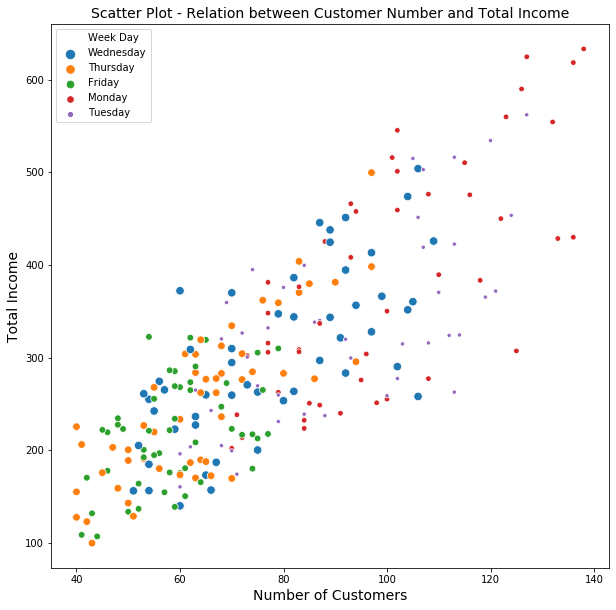

In [23]:
plt.figure(figsize=(10, 10)) # set plot size

# plot scatter plot with hue = Week Day and size = Week Day
ax = sns.scatterplot(x="Cust Number", y="Total Income", data=df, hue="Week Day",size="Week Day" )

# set title and labels
ax.set_title('Scatter Plot - Relation between Customer Number and Total Income', fontsize='14') 
plt.xlabel('Number of Customers', fontsize='14') 
plt.ylabel('Total Income', fontsize='14')

Group by day of the week contains information about the number of customers, printouts, Internet consumption and total income depending on the day of the week.

In [24]:
df_week = df.groupby('Week Day').sum()
df_week

,Cust Number,BW/Day,color/Day,BW print income,color print income,Internet Usage,Internet Income,Total Income
Week Day,,,,,,,,
Friday,3068,7841.0,3475.0,1568.2,3920.5,120240,6012.00,11500.70
Monday,4677,12713.0,5438.0,2542.6,6356.5,182490,9124.50,18023.60
Thursday,3325,9162.0,3890.0,1832.4,4581.0,132565,6628.25,13041.65
Tuesday,4069,9771.0,4487.0,1954.2,4885.5,158090,7904.50,14744.20
Wednesday,3955,10919.0,4632.0,2183.8,5459.5,154730,7736.50,15379.80


Table shows that Monday is busiest day and least customers come on Friday.

Bar plot below shows Number of Customer and Total Income depeding on Day of Week. 

Text(0.5, 1.0, 'Number of Customers and Total Income for Week Day in 2018')

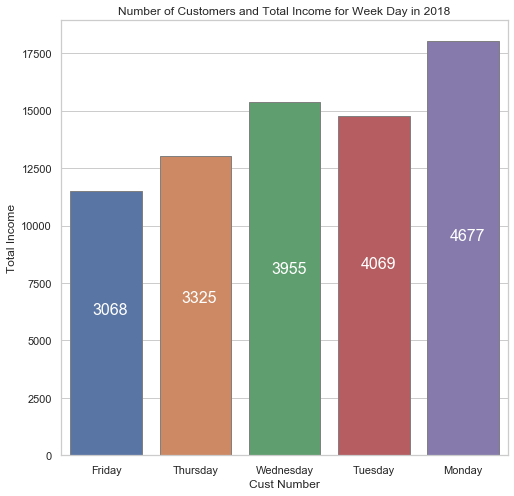

In [25]:
# Plot: Number of Customers and Total Income for Week Day in 2018 [11] 

sns.set(style="whitegrid") # set style of plot

plt.figure(figsize=(8, 8)) # set size of plot 
ax = sns.barplot(x="Cust Number", y="Total Income", data=df_week, edgecolor = "grey") # create barplot plot
labels = df_week['Cust Number'].sort_values()

# Create auto label
for i, v in enumerate(labels):
    ax.text(i-.15, v*2, labels[i], fontsize=16, color='white')

# set x ticks
xlabels=['Friday','Thursday','Wednesday','Tuesday','Monday']        
ax.set_xticklabels(xlabels)

# set title 
ax.set_title('Number of Customers and Total Income for Week Day in 2018')

Let's find out what is total income per month in 2018. 

In [26]:
# Create list of start and end dates for each month 

month_list = [["2018-01-01","2018-01-31"], 
              ["2018-02-01","2018-02-28"],
              ["2018-03-01","2018-03-31"],
              ["2018-04-01","2018-04-30"],
              ["2018-05-01","2018-05-31"],
              ["2018-06-01","2018-06-30"],
              ["2018-07-01","2018-07-31"],
              ["2018-08-01","2018-08-31"],
              ["2018-09-01","2018-09-30"],
              ["2018-10-01","2018-10-31"],
              ["2018-11-01","2018-11-30"],
              ["2018-12-01","2018-12-31"]]


# create empty lists to store total values
sum_list = [] 
customer_list = []
bw_income=[]
color_income=[]
internet_income=[]

# Iterate over month_list to generate pandas.series month and create data frame [1]

for month in month_list:
    #create pandas.series "month" for dates between start and end date 
    month =(df['Date'] > pd.to_datetime(month[0]).date()) & (df['Date'] <= pd.to_datetime(month[1]).date())
    #create new dataframe df_ 
    df_ = df.loc[month]
    # append to sum_list values from sum of total income for each month
    sum_list.append(df_['Total Income'].sum())
    customer_list.append(df_['Cust Number'].sum())
    bw_income.append(df_['BW print income'].sum())
    color_income.append(df_['color print income'].sum())
    internet_income.append(df_['Internet Income'].sum())

# round values in sum_list    
sum_list = np.around(sum_list,decimals=2)    

# Prints total income per month
month = ['Jan','Feb','March','Apr', 'May', 'Jun','July','Aug','Sept','Oct','Nov','Dec']
by_month = [print('Total Income for',i,':',j) for i,j in zip(month, sum_list)]

Total Income for Jan : 5413.55
Total Income for Feb : 5440.65
Total Income for March : 6046.8
Total Income for Apr : 6104.95
Total Income for May : 5479.55
Total Income for Jun : 5207.55
Total Income for July : 6813.2
Total Income for Aug : 5919.6
Total Income for Sept : 5877.1
Total Income for Oct : 6041.1
Total Income for Nov : 6199.3
Total Income for Dec : 5848.7


Let's plot our findings.

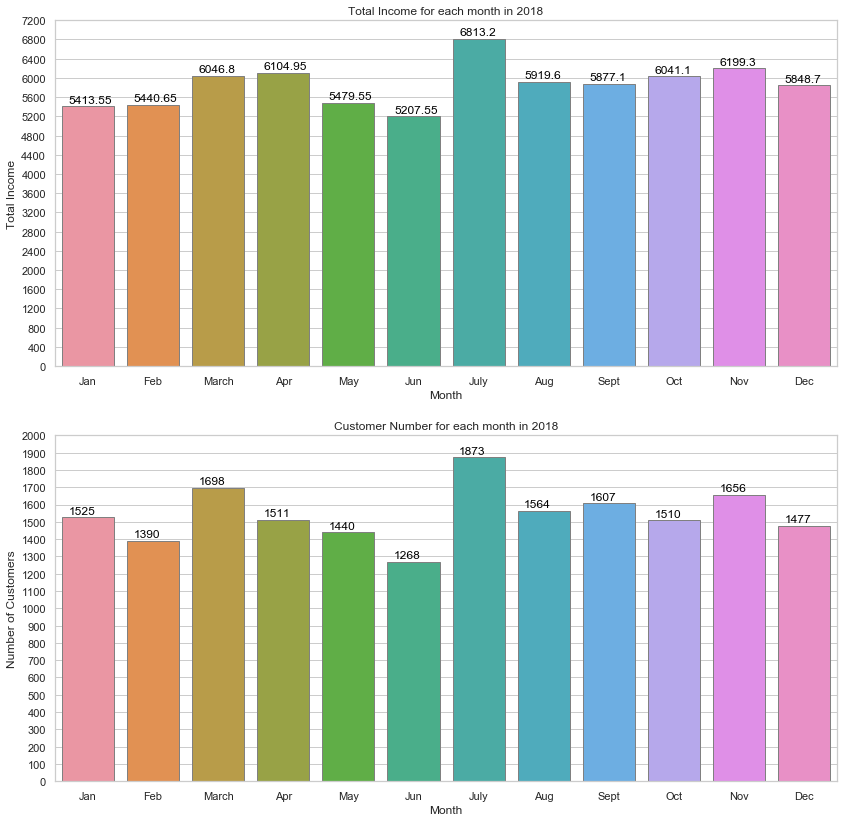

<Figure size 864x576 with 0 Axes>

In [27]:
# Plot:  Total Income and Number of Customers per Month in 2018
fig, ax = plt.subplots(2,1, figsize = (14,14))
sns.set(style="whitegrid") # set style of plot

plt.figure(figsize=(12, 8)) # set size of plot 
ax[0] = sns.barplot(x = month, y=sum_list,ax = ax[0],edgecolor = "grey") # create barplot plot
ax[1] = sns.barplot(x = month, y=customer_list,ax = ax[1],edgecolor = "grey")
#labels = sum_list

# Create auto labels
for i, v in enumerate(sum_list):
    ax[0].text(i-.3, v+70,sum_list[i], fontsize=12, color='black')
    
for i, v in enumerate(customer_list):
    ax[1].text(i-.3, v+20,customer_list[i], fontsize=12, color='black')


ax[0].set_title('Total Income for each month in 2018',fontsize=12)
ax[1].set_title('Customer Number for each month in 2018',fontsize=12)

ax[0].set_xlabel('Month')
ax[0].set_ylabel('Total Income')

ax[1].set_xlabel('Month')
ax[1].set_ylabel('Number of Customers')


ax[0].set_yticks(np.arange(0,7600,400))
ax[1].set_yticks(np.arange(0,2100,100))

The chart below shows the percentage values for total income by months. Total income is showed as sum of B/W printouts, Color Printouts and Internet Usage.  

([<matplotlib.axis.XTick at 0x13b6f9e8f08>,
 <a list of 12 Text xticklabel objects>)

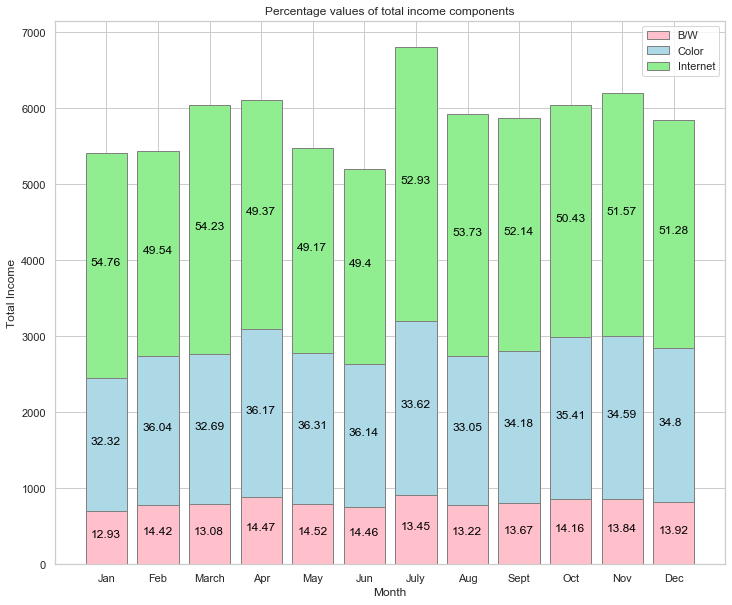

In [28]:
# Stacked Bar Plot [2] and [6] - Percentage values of total income components

plt.figure(figsize=(12, 10))
idx = np.arange(1,13)
p1 = plt.bar(idx, bw_income, facecolor='pink',edgecolor = "grey")
p2 = plt.bar(idx, color_income, bottom = bw_income, facecolor='lightblue',edgecolor = "grey")
p3 = plt.bar(idx, internet_income,facecolor='lightgreen', bottom = [x + y for x, y in zip(bw_income, color_income)],edgecolor = "grey" )

for i, v in enumerate(bw_income):
    plt.text(i+0.7, v/2,np.around(bw_income[i]/sum_list[i]*100,2), fontsize=12, color='black')

for i, v in enumerate(color_income):
    plt.text(i+0.7, bw_income[i]+v/2,np.around(color_income[i]/sum_list[i]*100,2), fontsize=12, color='black')

for i, v in enumerate(internet_income):
    plt.text(i+0.7, bw_income[i]+color_income[i]+v/2,np.around(internet_income[i]/sum_list[i]*100,2), fontsize=12, color='black')
    
plt.title('Percentage values of total income components',fontsize=12)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Total Income',fontsize=12)


plt.legend((p1[0], p2[0], p3[0]), ('B/W', 'Color','Internet'))
plt.xticks(idx, (month))



Scatter plot shows relationsip between total income and B/W, Color printouts.

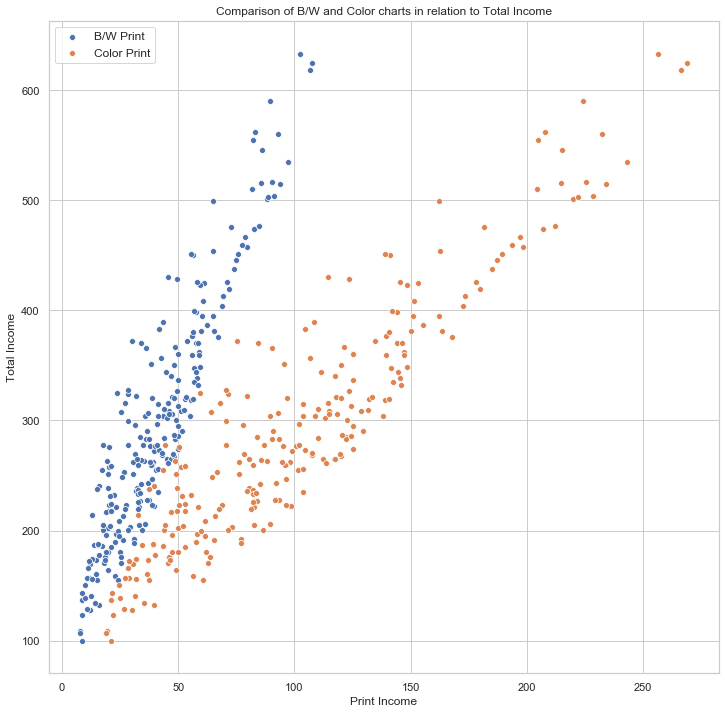

In [29]:
plt.figure(figsize=(12, 12))
ax = sns.scatterplot(x="BW print income", y="Total Income", label='B/W Print',data=df)
ax = sns.scatterplot(x="color print income", y="Total Income", label='Color Print',data=df)
ax.set_title('Comparison of B/W and Color charts in relation to Total Income',fontsize=12)
ax.set_xlabel('Print Income',fontsize=12)
ax.legend(fontsize=12)

### 3.2 Distribution

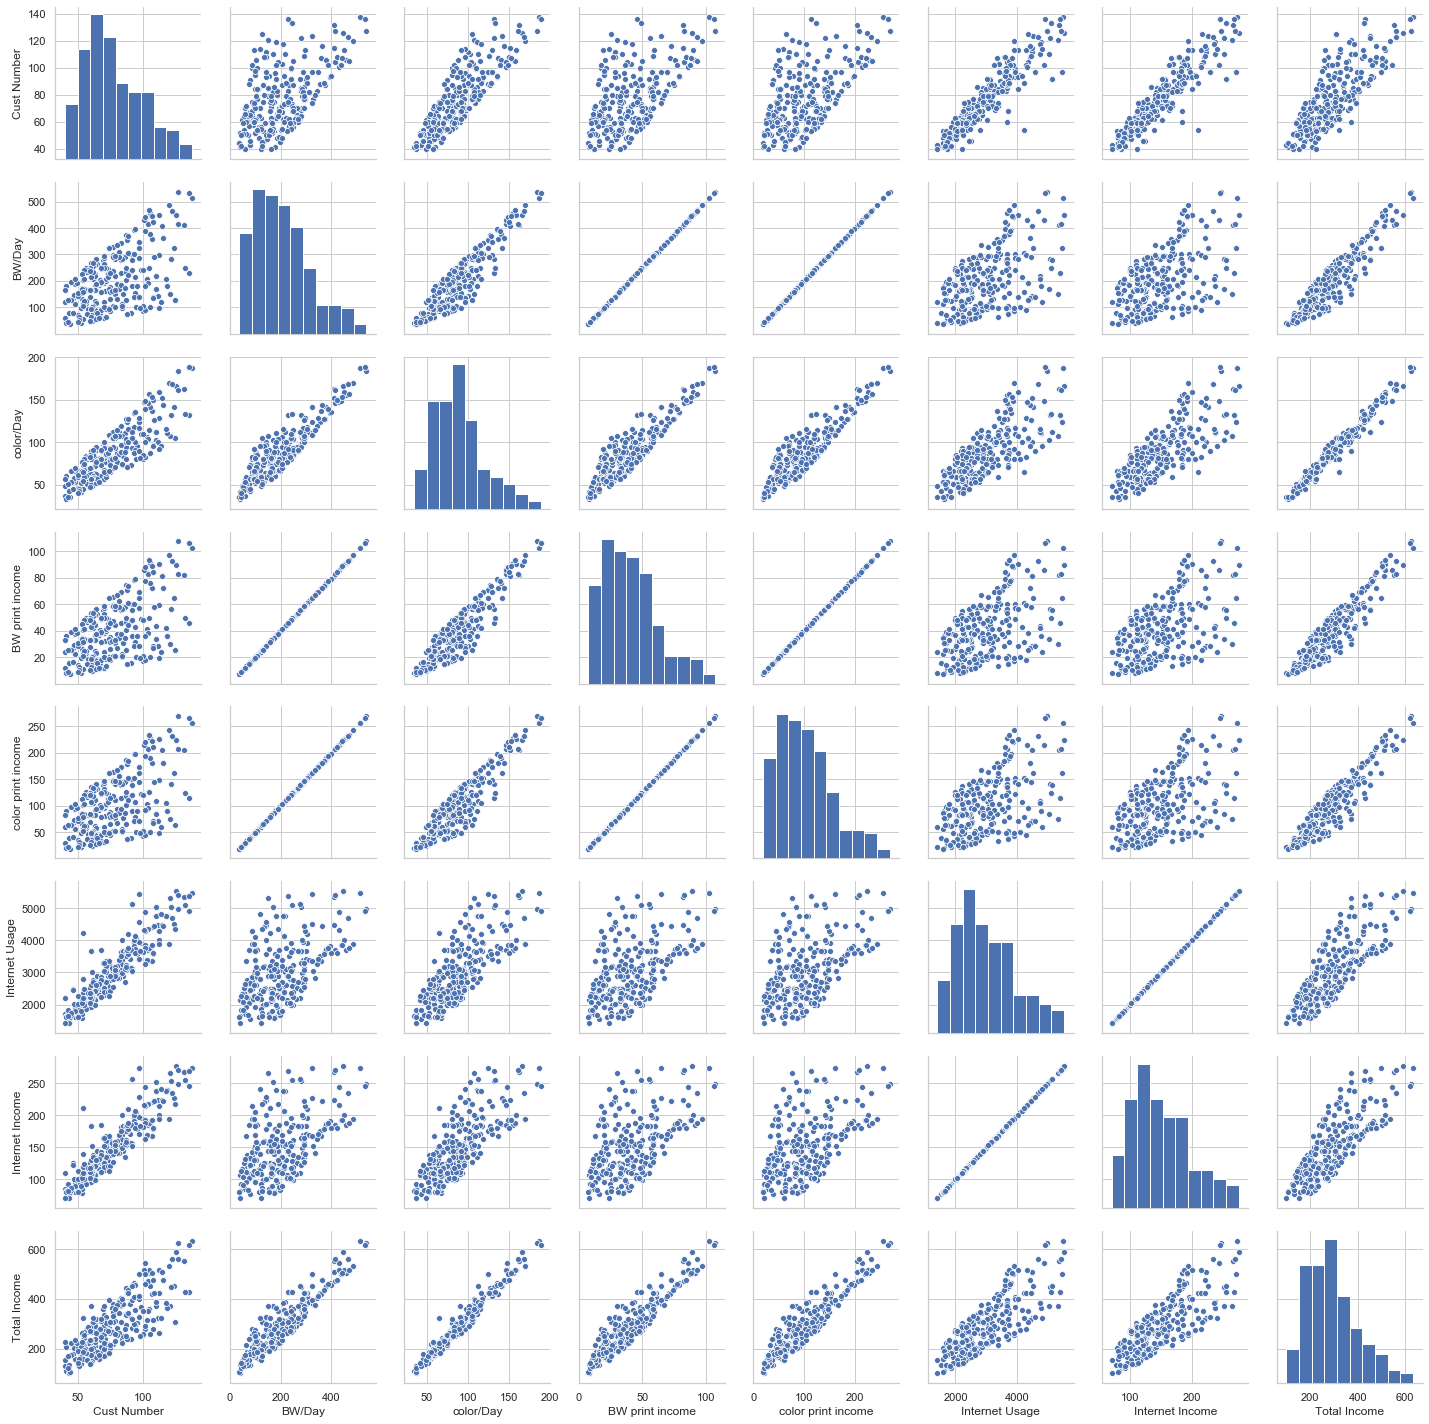

In [30]:
sns.pairplot(df)

#### 3.2.1 Visual Normality Checks - Histogram plots

([<matplotlib.axis.XTick at 0x13b729e2ec8>,
 <a list of 14 Text xticklabel objects>)

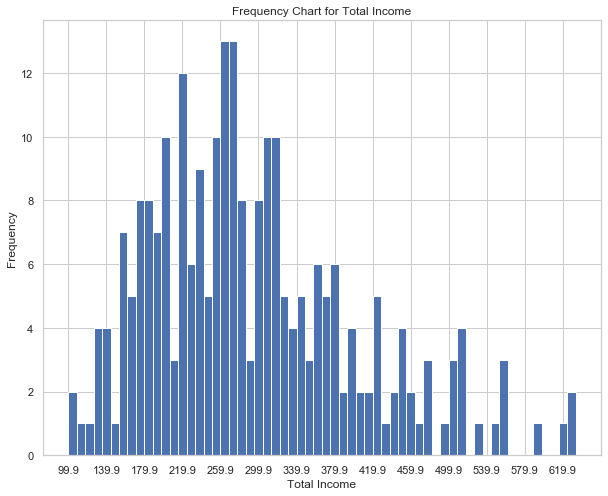

In [31]:
# Plot - Frequency Chart - Total Income
plt.figure(figsize=(10, 8))
plt.hist(df['Total Income'], bins=60) # plot histogram with number of bins equal 
                                                                            # to length of minutes_per_customer_rounded list 

plt.title('Frequency Chart for Total Income') # set title
plt.xlabel('Total Income') # set X label
plt.ylabel('Frequency') # set Y label

plt.xticks(np.arange(min(df['Total Income']),max(df['Total Income'])+5 , 40)) # set X axis ticks 
#plt.yticks(np.arange(0,20,1)) # set Y axis ticks

([<matplotlib.axis.XTick at 0x13b73525308>,
 <a list of 21 Text xticklabel objects>)

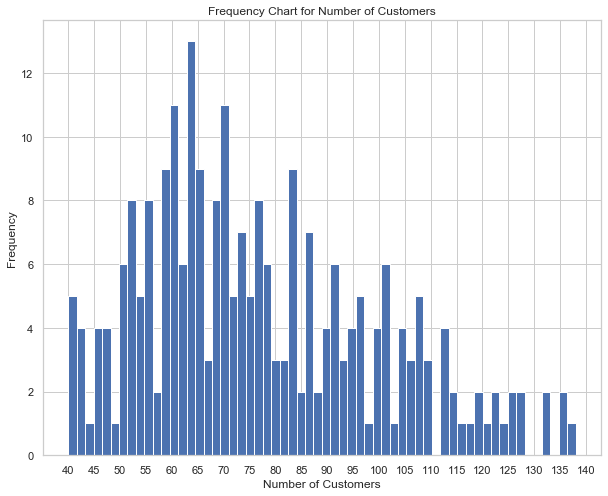

In [32]:
# Plot - Frequency Chart - Customer Number
plt.figure(figsize=(10, 8))
plt.hist(df['Cust Number'], bins=60) # plot histogram with number of bins equal 
                                                                            # to length of minutes_per_customer_rounded list 

plt.title('Frequency Chart for Number of Customers') # set title
plt.xlabel('Number of Customers') # set X label
plt.ylabel('Frequency') # set Y label

plt.xticks(np.arange(min(df['Cust Number']),max(df['Cust Number'])+5 ,5)) # set X axis ticks 
#plt.yticks(np.arange(0,20,1)) # set Y axis ticks

#### 3.2.2 Q-Q plot

popular plot for checking the distribution of a data sample is the quantile-quantile plot.

    A perfect match for the distribution will be shown by a line of dots on a 45-degree angle from the bottom left of the plot to the top right. Often a line is drawn on the plot to help make this expectation clear. Deviations by the dots from the line shows a deviation from the expected distribution. [15]

[Text(0, 0.5, 'Total Income'), Text(0.5, 1.0, 'Q-Q Test - Total Income')]

<Figure size 432x288 with 0 Axes>

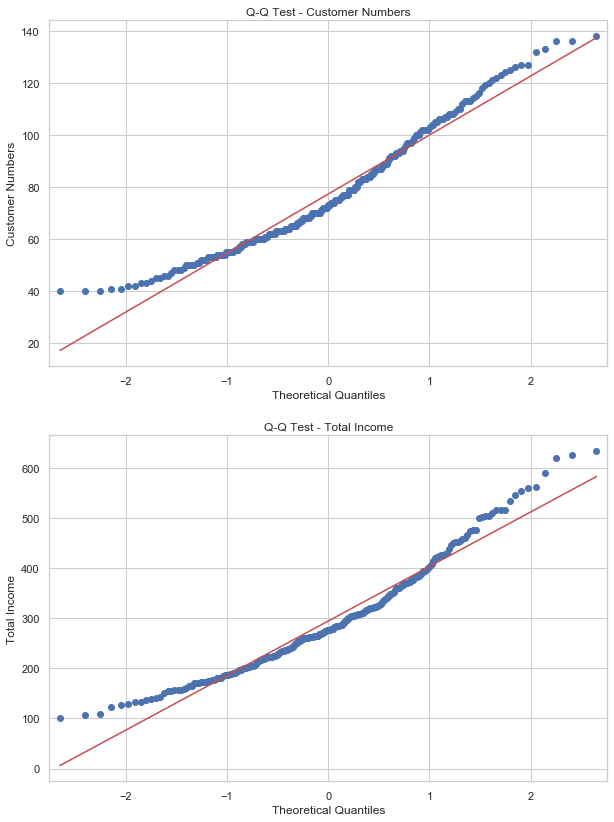

In [33]:
# Q-Q Plot [15]
plt.figure()

fig, ax = plt.subplots(2,1, figsize=(10, 14))

# plot qq charts with data
qqplot(df['Cust Number'],ax = ax[0], line='s', )
qqplot(df['Total Income'],ax = ax[1], line='s', )


# set title and axis labels
ax[0].set(title='Q-Q Test - Customer Numbers', ylabel = 'Customer Numbers' )
ax[1].set(title='Q-Q Test - Total Income', ylabel = 'Total Income')

Graphic charts show that our distribution is positively skewed [8]. 

#### 3.2.3 Kolmogorov-Smirnov test

    In statistics, the Kolmogorov–Smirnov test (K–S test or KS test) is a nonparametric test of the equality of continuous, one-dimensional probability distributions that can be used to compare a sample with a reference probability distribution (one-sample K–S test), or to compare two samples (two-sample K–S test). It is named after Andrey Kolmogorov and Nikolai Smirnov [5].


The script below will allows to roughly determine the type of best fit distribution. The larger the p-value, the better the data matches the theoretical distribution values.

In [34]:
# Script taken from Stackoverflow [11] and [10] 

import warnings
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", 
                  "exponweib",
                  "pareto", 
                  "weibull_max", 
                  "weibull_min",
                  "skewnorm",
                  "norminvgauss",
                  "powernorm",
                  "uniform"]
    
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value
    print(" ")
    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

   # return best_dist, best_p, params[best_dist]

In [35]:
get_best_distribution(df['Total Income'])

p value for norm = 0.06080612785151675
p value for exponweib = 1.193590663506136e-111
p value for pareto = 1.0289221820492487e-22


C:\Users\Slawomir Sowa\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1469: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))
C:\Users\Slawomir Sowa\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2381: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


p value for weibull_max = 2.1600865769938575e-179
p value for weibull_min = 1.6329814685186218e-171
p value for skewnorm = 0.8894263852608313
p value for norminvgauss = 0.8812809276230692
p value for powernorm = 0.0
p value for uniform = 2.1841794435420635e-18
 
Best fitting distribution: skewnorm
Best p value: 0.8894263852608313
Parameters for the best fit: (4.55392294351908, 158.4562965489935, 174.05979799537357)


Script confirms that our data are skewed distribution.

### 3.3 Simple Linear Regression

Linear regression is probably one of the most important and widely used regression techniques. It’s among the simplest regression methods. One of its main advantages is the ease of interpreting results [3].

$$ y =  b_1{x} + b_0$$<br>

where: $b_0$ - calles also as y-intercept, indicates the location where it cross an y axis, $b_1$ - The slope indicates the steepness of a line, $y$ - dependent variable,<br> $x$ - independent variable

In [36]:
# reshape 'total_bill' column to 2D array [3]
z = df['Cust Number']

x = z.values.reshape(-1,1)
x.shape


(247, 1)

In [37]:
y = df['Total Income']
y.shape

(247,)

In [38]:
#calculate parameters for linear regression
model = LinearRegression()
results = model.fit(x, y)

In [39]:
print('b0, y-intercept:', results.intercept_) # The y-intercept indicates the location where it cross an y axis
print('b1, slope:', results.coef_) # The slope indicates the steepness of a line

b0, y-intercept: -0.03600531486421232
b1, slope: [3.80741821]


The value $b_0 = -0.036$ (approximately) illustrates that our model predicts the response -0.036 when 𝑥 is zero. The value $𝑏_1 = 3.81$ means that the predicted response rises by 3.81 when 𝑥 is increased by one [3].

Our estimated regression equation:
$$ y =3.81x + -0.036$$<br>

Text(0, 0.5, 'Total Income')

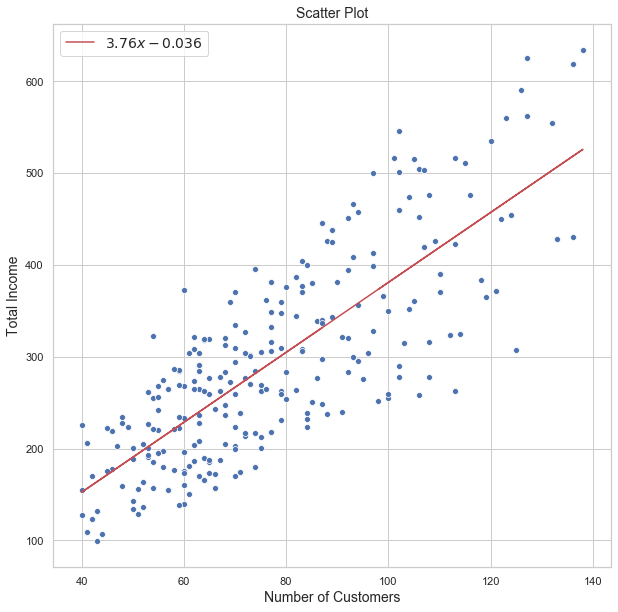

In [40]:
# scatter plot and estimated regression line [9]

plt.figure(figsize=(10, 10))
ax = plt.plot(x, 3.81 * x -0.036, 'r-', label=r"$3.76x - 0.036$")
ax = sns.scatterplot(x="Cust Number", y="Total Income", data=df )
ax.legend(fontsize='14')
ax.set_title('Scatter Plot', fontsize='14')
plt.xlabel('Number of Customers', fontsize='14')
plt.ylabel('Total Income', fontsize='14')

To check how good our model fits data we can use $R^2$ value. $R^2$ is a "goodness-of-fit" measure for linear regression models.  Higher $R^2$ values represent smaller differences between the observed data and the fitted values and is the percentage of the dependent variable variation that a linear model explains [13]

$$R^2 = \frac {Variance \: explained \: by\: the\: model}{Total\: Variance}$$

In [41]:
R_sqr = results.score(x, y)
print (f'R square is equal: {R_sqr}')

R square is equal: 0.6288137310019883


The larger the R2, the better the regression model fits our observations. In our case we got  $ R^2 = 62.9\%$ . 

#### The Method of Least Squares (Cost)

We may define the error (cost) associated to $ y =  b_1{x} + b_0$ as a 

$$
 Cost = \sum_{i} (y_i - b_1x_i - b_0)^2 
$$ 

For calculated previously values $b_1 = 3.76$ and $b_0 = 3.93$ we are getting the lowest error value.

In [42]:
# Calculating Cost [12]
b1 = 3.81
b0 = -0.036

cost = 0
for i in range (x.size):
    value = (y[i] - b1 * x[i] - b0)**2
    
    cost += value

print (cost)

[1086056.642132]


In [43]:
# Getting Linear regression results Using statsmodels [4].
import statsmodels.api as sm

# Tell statmodels to include an intercept.
xwithc = sm.add_constant(x)

# Create a model.
msm = sm.OLS(y, xwithc)
# Fit the data.
rsm = msm.fit()
# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:           Total Income   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     415.0
Date:                Mon, 16 Dec 2019   Prob (F-statistic):           1.21e-54
Time:                        14:53:04   Log-Likelihood:                -1386.5
No. Observations:                 247   AIC:                             2777.
Df Residuals:                     245   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0360     15.055     -0.002      0.9

### 4. Conclusions

The main goal of the above project was to generate hypothetical data for the phenomenon of his choice. I worked in an internet cafe for almost 5 years.

Table Description:
- index - First column is an index generated by Pandas Dataframe
- Date - dates on which the internet cafe was open (2018)
- Week Day - Days of the week
- Cust Number - The number of customers who visited the store on a given date
- BW/Day - Number of Black and White Pages printed on a given day
- color/Day - Number of Color Pages printed on a given day
- BW print income - Daily Income from printout in black and white - (€0.20 per page)
- color print income - Daily Income from printout in color - (€0.50 per page)
- Internet Usage - Daily number of minutes used for internet
- Internet Income - Daily Income from Internet Usage - (€0.25 per 5 min)
- Total Income - Daily Income - sum of B/W printouts, Color printouts and Internet Usage.

To generate the data I used libraries such as:

- datetime - generated dates
- calendar - to get Week Day
- numpy.random.randint - to generate number of cutomers visiting shop
- numpy.random.uniform - to generate printout for B / W in range 0.8 - 4.5
- numpy.random.uniform - to generate printout for color in range 0.8 - 1.5
- numpy.random.pareto - to generate internet usage per customer and sume of that values ​​gives me daily internet usage.

In the second part of the project, I analyzed the generated data to show the relationship between the number of clients and total income and how individual components have an impact on total income, i.e. B / W print, Color print and Internet Usage.

Using the histogram, Q-Q plot and Kolmogorov-Smirnov test, I indicated the type of distribution received.

Finally, I adjusted the regression line to the data, calculated $b_0$ and $b_1$, $R^2$ and $Cost$.

### 5. References 

[1] - https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates <br>
[2] - https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm<br>
[3] - https://realpython.com/linear-regression-in-python/<br>
[4] - https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/regression.ipynb<br>
[5] - https://en.m.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test<br>
[6] - https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781849513265/1/ch01lvl1sec17/plotting-stacked-bar-charts<br>
[7] - "Introducing Data Science" Davy Cielen, Arno D. B. Meysman, Mohamed Ali - Manning 2016<br>
[8] - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewnorm.html#scipy.stats.skewnorm<br>
[9] - https://seaborn.pydata.org/tutorial/regression.html<br>
[10] - https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html<br>
[11] - https://stackoverflow.com/a/53452793/11107506<br>
[12] - https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb <br>
[13] - https://statisticsbyjim.com/regression/interpret-r-squared-regression/<br>
[14] - https://matplotlib.org/3.1.1/gallery/color/color_demo.html#sphx-glr-gallery-color-color-demo-py<br>
[15] - https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/